## Linear-Regression

We will learn a very simple model, linear regression, and also learn an optimization algorithm-gradient descent method to optimize this model. Linear regression is a very simple model in supervised learning, and gradient descent is also the most widely used optimization algorithm in deep learning. We will start our deep learning journey from here.

### Simple Linear Regression

Simple linear regression is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable. It looks for statistical relationship but not deterministic relationship. Relationship between two variables is said to be deterministic if one variable can be accurately expressed by the other. For example, using temperature in degree Celsius it is possible to accurately predict Fahrenheit. Statistical relationship is not accurate in determining relationship between two variables. For example, relationship between height and weight.

<b>The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.<b>

$$
\hat{y}_i = w x_i + b
$$

The values w and b must be chosen so that they minimize the error. If sum of squared error is taken as a metric to evaluate the model, then goal to obtain a line that best reduces the error.

![](https://cdn-images-1.medium.com/max/800/1*Utp8sgyLk7H39qOQY9pf1A.png)

If we take mean squared error: 

$$
\frac{1}{n} \sum_{i=1}^n(\hat{y}_i - y_i)^2
$$

So, how do we minimize this error? 
<b>Gradient descent</b> is needed here . This is the first optimization algorithm we have come into contact with. It is very simple, but it is very powerful and is used extensively in deep learning. So let us understand the principle of gradient descent method from a simple example.

## Gradient Descent

In the gradient descent method, we first need to clarify the concept of the gradient, and then we will understand how to use the gradient to reduce.

### Gradient

The gradient is mathematically a derivative. If it is a multivariate function, the gradient is the partial derivative. For example, a function f(x, y), then the gradient of f is
$$
(\frac{\partial f}{\partial x},\ \frac{\partial f}{\partial y})
$$

The following image is the gradient of $f(x) = x^2$ at x=1
![](https://ws3.sinaimg.cn/large/006tNc79ly1fmarbuh2j3j30ba0b80sy.jpg)

What is the meaning of the gradient? In a geometric sense, the gradient value of a point is the fastest change of this function. 

### Gradient Descent

With an understanding of the gradient, we can understand the principle of gradient descent. Above we need to minimize this error, that is, we need to find the minimum point of this error, then we can find this minimum point along the opposite direction of the gradient.

We can look at an intuitive explanation. For example, we are somewhere on a mountain. Because we don't know how to go down the mountain, we decided to take one step, that is, when we go to a position, solve the gradient of the current position, along the negative direction of the gradient. It is the current steepest position to go down one step, then continue to solve the current position gradient, and take a step along the steepest and most easy downhill position. This step by step, go all the way to think that we have reached the foot of the mountain. Of course, if we go on like this, we may not be able to go to the foot of the mountain, but to the low point of a certain local peak.

The problem with our analogy is that along the opposite direction of the gradient, we constantly change the values ​​of w and b, and finally find the best set of w and b to minimize the error.

At the time of the update, we need to decide the extent of each update. For example, in the downhill example, we need the length of the step that goes down each time. This length is called the learning rate. 


![](https://i.imgur.com/NG6kzAw.gif)

You can see that the above learning rate is more appropriate, and the learning rate below is too large, which will lead to continuous beating.

Finally, our update formula is

$$
w := w - \eta \frac{\partial f(w,\ b)}{\partial w} \\
b := b - \eta \frac{\partial f(w,\ b)}{\partial b}
$$

By continually iteratively updating, we are finally able to find a set of optimal w and b, which is the principle of the gradient descent method.

Finally, this method can be used to illustrate this method visually.


![](http://www.xpertup.com/wp-content/uploads/2018/05/1-1.gif)

### Example
Here is the example to learn more about Linear regression

In [24]:
import torch
import numpy as np
from torch.autograd import Variable

torch.manual_seed(20)

In [25]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

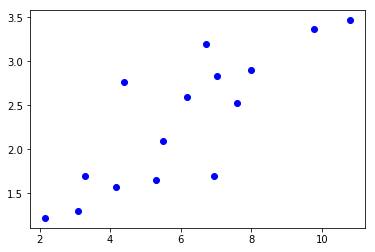

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_train, y_train, 'bo')

In [27]:
#Convert to pytorch tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

# Define Parameter w & b
w = Variable(torch.randn(1), requires_grad=True) # Random Initialize
b = Variable(torch.zeros(1), requires_grad=True) # Inititalize with 0

In [28]:
# Build a linear regression model
x_train = Variable(x_train)
y_train = Variable(y_train)

def linear_model(x):
    return x * w + b

In [29]:
y = linear_model(x_train)

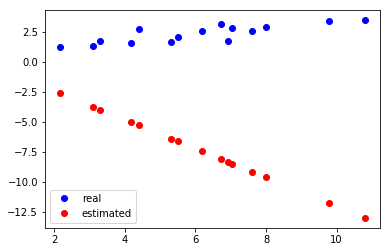

In [30]:
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y.data.numpy(), 'ro', label='estimated')
plt.legend()

Now we need to calculate Loss. 


$$
\frac{1}{n} \sum_{i=1}^n(\hat{y}_i - y_i)^2
$$


In [31]:
def get_loss(y, y_train):
    return torch.mean((y - y_train) ** 2)

loss = get_loss(y, y_train)


In [32]:
print(loss)

tensor(104.9967, grad_fn=<MeanBackward1>)


After defining the error function, we need to calculate the gradients of w and b. At this time, thanks to PyTorch's automatic derivation, we don't need to manually calculate the gradient.
Interested Students can see implementation of gradient Descent here:


In [ ]:
#gradient descent 
def grad_descent(s_slope, s_intercept, l_rate, iter_val, x_train, y_train):
    
    for i in range(iter_val):
        int_slope = 0
        int_intercept = 0
        n_pt = float(len(x_train))
        
        
        for i in range(len(x_train)):
            int_intercept += - (2/n_pt) * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            int_slope += - (2/n_pt) * x_train[i] * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            
        final_slope = s_slope - (l_rate * int_slope)
        final_intercept = s_intercept - (l_rate * int_intercept)
        s_slope = final_slope
        s_intercept = final_intercept
        
        
    return  s_slope, s_intercept

In [33]:
# Automatic derivation
loss.backward()

In [34]:
#View gradient of w & b
print(w.grad)
print(b.grad)

tensor([-133.1749])
tensor([-19.2775])


In [35]:
# Update parameter once
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data

After updating the completion parameters, let's take a look at the results of the model output again.

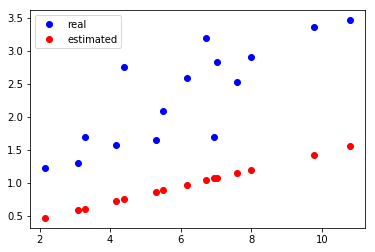

In [36]:
y = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y.data.numpy(), 'ro', label='estimated')
plt.legend()

As you can see from the above example, after the update, the red line runs below the blue line. There is no particularly good fit to the true value of blue, so we need to update it several times.

In [37]:
for e in range(10): # 10 updates
    y = linear_model(x_train)
    loss = get_loss(y, y_train)
    
    w.grad.zero_() # Remember zero return gradient
    b.grad.zero_() 
    loss.backward()
    
    w.data = w.data - 1e-2 * w.grad.data # update w
    b.data = b.data - 1e-2 * b.grad.data # update b
    print('epoch: {}, loss: {}'.format(e, loss.data[0]))

epoch: 0, loss: 2.1443493366241455
epoch: 1, loss: 0.2407105565071106
epoch: 2, loss: 0.20529970526695251
epoch: 3, loss: 0.20446452498435974
epoch: 4, loss: 0.204270139336586
epoch: 5, loss: 0.20408859848976135
epoch: 6, loss: 0.20390814542770386
epoch: 7, loss: 0.20372863113880157
epoch: 8, loss: 0.2035500854253769
epoch: 9, loss: 0.20337240397930145


C:\Users\Codeseeder\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # This is added back by InteractiveShellApp.init_path()


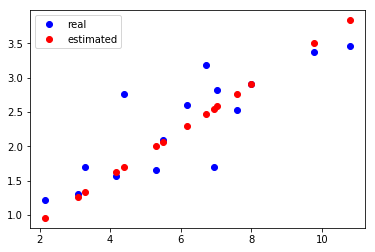

In [38]:
y = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y.data.numpy(), 'ro', label='estimated')
plt.legend()

After 10 updates, we found that the red prediction results have been better fitted to the true value of blue.

Now that you have learned your first machine learning model, keep working hard and complete the following small exercises.

### Small exercise

Restart the notebook and run the above linear regression model, but change the number of trainings and different learning rates to try to get different results.